# Project: Investigate a Dataset - No Show Appointments

## Introduction

### Dataset Description 

This dataset was collected from a hundred thousand medical appointments in Brazil.
Various observations about each appointment were recorded.
This dataset focuses on whtehr or not the patients showed up for their scheduled appointments.

'PatientID' is the individual identifier for each patient.
'AppointmentID' is the identification number for each individual appointment scheduled.
'Gender' is the biolgical sex of the individual.
'ScheduledDay' is the day the patient scheduled the appointment.
'AppointmentDay' is the day the appointment is scheduled to take place.
'Age' is the age of the patient.
'Neighborhood' indicates the location of the hospital.
'Scholarship' is status of enrollment in the Brasilian welfare program.
'Hipertension' indicates whether or not the patient has a history of hypertension.
'Diabetes' indicates whether or not the patient has a history of diabetes.
'Alcoholism' indicates whether or not the patient has a history of alcoholism.
'Handcap' indicates whether or not the patient is handicapped.
'SMS_received' indicates if the patient was sent a text message reminder.
'No-show' indicated whether or not the patient was present for the appointment.


### Questions for Analysis

1. Is there any correlation between age and no-show appointments? 
  
  
2. What impact does being enrolled in the Brasilian welfare program (scholarship) have on the likelihood of patients showing up, if any?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Upgrade pandas to use dataframe.explode() function. 

!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
appt_df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [4]:
appt_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
appt_df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
appt_df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
62416,9.847500e+11,5602128,F,2016-04-19T14:21:03Z,2016-05-25T00:00:00Z,42,JARDIM CAMBURI,0,0,0,0,0,1,No
68011,2.326762e+12,5665211,F,2016-05-05T14:06:43Z,2016-05-06T00:00:00Z,26,JARDIM CAMBURI,0,0,0,0,0,0,No
66073,9.437323e+13,5606618,F,2016-04-20T10:30:44Z,2016-05-16T00:00:00Z,11,TABUAZEIRO,1,0,0,0,0,0,No
22516,5.781369e+12,5638979,F,2016-04-29T08:38:08Z,2016-05-02T00:00:00Z,90,SÃO BENEDITO,0,1,0,0,1,1,Yes
108222,2.351682e+13,5741898,F,2016-05-30T07:32:37Z,2016-06-02T00:00:00Z,34,JOANA D´ARC,0,1,0,0,0,1,No
29618,9.554331e+13,5659078,M,2016-05-04T13:06:24Z,2016-05-04T00:00:00Z,10,REDENÇÃO,0,0,0,0,0,0,No
9730,4.837372e+13,5724235,F,2016-05-20T09:13:12Z,2016-05-20T00:00:00Z,3,REPÚBLICA,0,0,0,0,0,0,No
60453,1.195269e+13,5587750,M,2016-04-15T09:02:58Z,2016-05-02T00:00:00Z,38,SANTA LÚCIA,0,0,0,0,0,1,No
96722,6.169878e+13,5762290,M,2016-06-02T07:32:55Z,2016-06-06T00:00:00Z,15,CARATOÍRA,0,1,0,0,0,1,No
39638,5.925378e+10,5683754,F,2016-05-11T07:50:47Z,2016-05-17T00:00:00Z,17,INHANGUETÁ,0,0,0,0,0,0,No


In [7]:
appt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
appt_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The AppointmentID values are ints and should be strings. ScheduledDay and AppointmentDay should both be in datetime format instead of strings. Column names have typos, inconsistant capitilization, and inconsistant formatting. All yes or no columns, such as Alcoholism, SMS_recieved, and No-show, should be bolleans, instead of ints and strings.

In [9]:
appt_df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age','neighbourhood', 
                   'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicapped', 'received_sms', 'no_show']

In [10]:
appt_df['appointment_id'] = appt_df['appointment_id'].astype(str)

In [11]:
appt_df['scheduled_day'] = pd.to_datetime(appt_df.scheduled_day)

In [12]:
appt_df['appointment_day'] = pd.to_datetime(appt_df.appointment_day)

In [13]:
appt_df['scholarship'] = appt_df['scholarship'].astype(str)
appt_df['scholarship'] = appt_df['scholarship'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [14]:
appt_df['hypertension'] = appt_df['hypertension'].astype(str)
appt_df['hypertension'] = appt_df['hypertension'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [15]:
appt_df['diabetes'] = appt_df['diabetes'].astype(str)
appt_df['diabetes'] = appt_df['diabetes'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [16]:
appt_df['alcoholism'] = appt_df['alcoholism'].astype(str)
appt_df['alcoholism'] = appt_df['alcoholism'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [17]:
appt_df['handicapped'] = appt_df['handicapped'].astype(str)
appt_df['handicapped'] = appt_df['handicapped'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [18]:
appt_df['received_sms'] = appt_df['received_sms'].astype(str)
appt_df['received_sms'] = appt_df['received_sms'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [19]:
appt_df['no_show'] = appt_df['no_show'].astype(str)

In [20]:
appt_df.sample(5)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,received_sms,no_show
75483,2.189119e+13,5717967,M,2016-05-19 08:41:32+00:00,2016-05-25 00:00:00+00:00,35,NOVA PALESTINA,No,Yes,No,No,No,Yes,No
98208,1.982139e+12,5765953,M,2016-06-02 14:05:58+00:00,2016-06-02 00:00:00+00:00,0,JABOUR,No,No,No,No,No,No,No
84274,1.194725e+12,5733297,M,2016-05-24 13:40:18+00:00,2016-06-02 00:00:00+00:00,61,REPÚBLICA,No,No,No,Yes,No,Yes,No
14326,7.857782e+13,5677664,M,2016-05-10 07:29:14+00:00,2016-05-20 00:00:00+00:00,10,SANTO ANDRÉ,No,No,No,No,No,No,Yes
108425,8.253223e+13,5615886,M,2016-04-25 13:11:28+00:00,2016-06-03 00:00:00+00:00,1,RESISTÊNCIA,No,No,No,No,No,Yes,No


## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.

### Is there any correlation between age and no-show appointments? 

IndexError: tuple index out of range

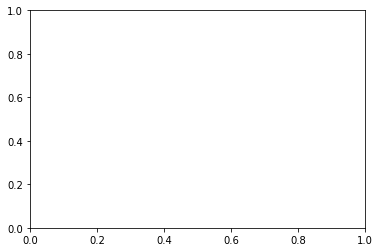

In [22]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Count the number of occurrences of each age where 'no_show' == 'No'
age_no_show_counts_no = appt_df[appt_df['no_show'] == 'No'].groupby('age')['no_show'].count()

# Count the number of occurrences of each age where 'no_show' == 'Yes'
age_no_show_counts_yes = appt_df[appt_df['no_show'] == 'Yes'].groupby('age')['no_show'].count()

# Plot the counts of each age
plt.plot(age_no_show_counts_yes.index, age_no_show_counts_yes.values, label = 'Did not Show', color = 'red')
plt.plot(age_no_show_counts_no.index, age_no_show_counts_no.values, label='Showed', color = 'green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()



### What impact does being enrolled in the Brasilian welfare program have on the likelihood of patients showing up, if any?

In [22]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# Count the number of occurrences of each age where 'no_show' == 'No'
enrolled_no_show_counts_no = appt_df[appt_df['no_show'] == 'No'].groupby('scholarship')['no_show'].count()

# Count the number of occurrences of each age where 'no_show' == 'Yes'
enrolled_no_show_counts_yes = appt_df[appt_df['no_show'] == 'Yes'].groupby('scholarship')['no_show'].count()

plt.pie()

# Plot the counts of each age
plt.scatter(enrolled_no_show_counts_yes.index, enrolled_no_show_counts_yes.values, label = 'Did not Show', color = 'red')
plt.scatter(enrolled_no_show_counts_no.index, enrolled_no_show_counts_no.values, label='Showed', color = 'green')
plt.xlabel('Enrolled')
plt.ylabel('Count')
plt.legend()
plt.show()

TypeError: pie() missing 1 required positional argument: 'x'

## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

### Limitation
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])